# Tugas Praktikum

### Daffa Yudisa Akbar
### TI - 3A / 06
### 2241720008

## Tugas 1

Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

**Import Library**

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Mempersiapkan Data** 

In [269]:
df = pd.read_csv('../Jobsheet6_EnsembleLearning/Data/mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [270]:
# Cek kolom null
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [271]:
# Melakukan encoder pada data, karena data berupa karakter
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop(columns=['class'])
y = df['class']  

print(f"Shape of X: {X.shape}\n")
print(f"Encoded labels: {y}")

# Cek jumlah fitur dan instance
print(X.shape)

# Cek label
print(y)

Shape of X: (8124, 22)

Encoded labels: 0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32
(8124, 22)
0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


In [272]:
# Split data training dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

**Traning Decision Tree**

In [273]:
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

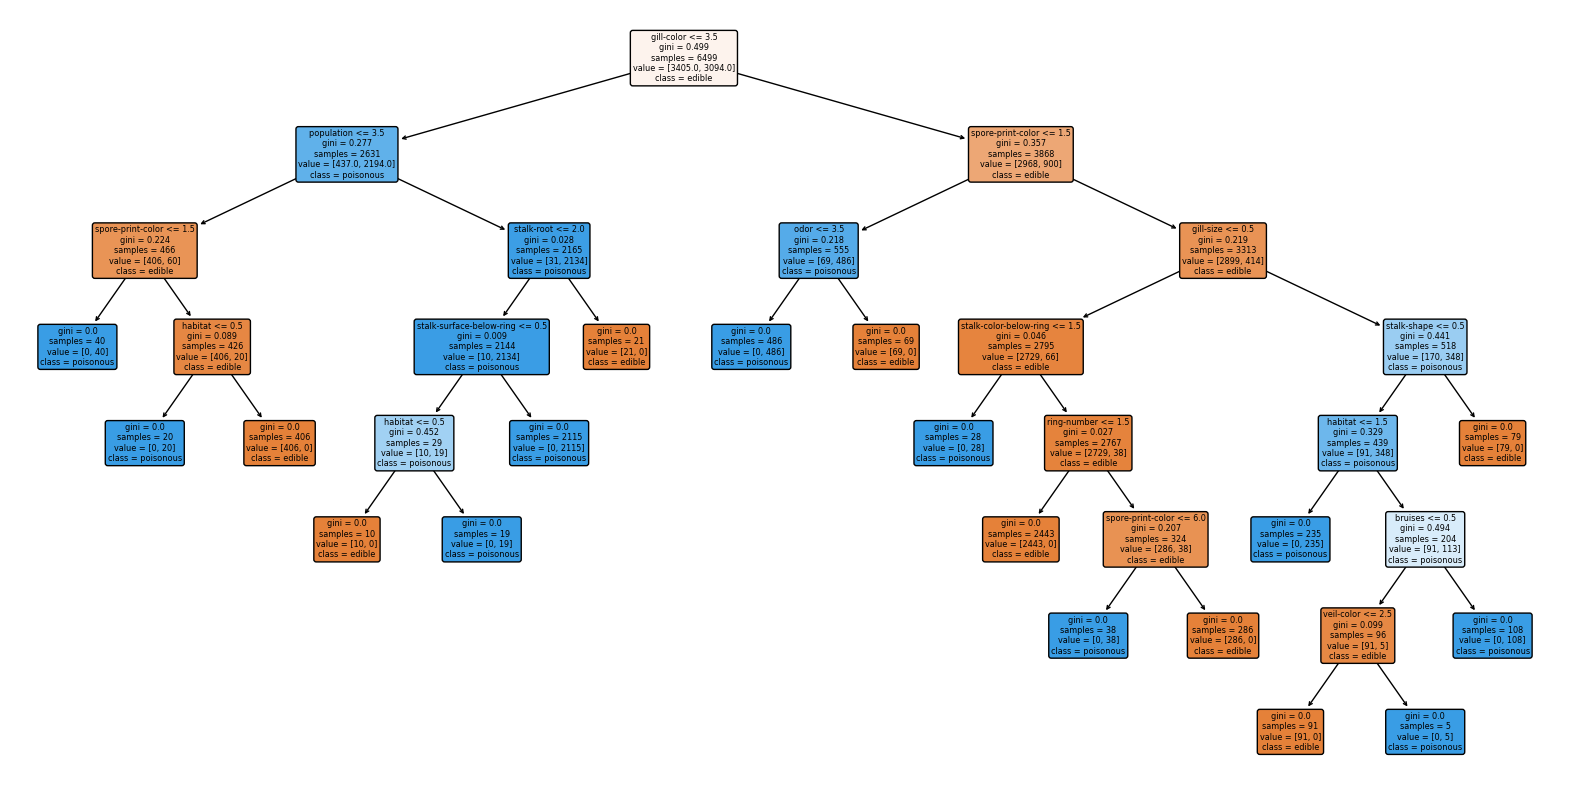

In [274]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Mengambil model Decision Tree terbaik dari GridSearchCV
best_dt = dt_grid.best_estimator_

# Menggambar Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X_train.columns, class_names=['edible', 'poisonous'], rounded=True)
plt.show()

**Traning Random Forest**

In [275]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

**Evaluasi**


In [276]:
# Menunjukkan parameterb terbaik dari Decision Tree dan Random Forest
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best Random Forest parameters:", rf_grid.best_params_)

# Melakukan prediksi dan menunjukkan akurasi dari Decision Tree dan Random Forest
dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test)
y_pred_rf = rf_best.predict(X_test)

# Accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100 :.2f} %")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100 :.2f} %")

# Classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Random Forest parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Decision Tree Accuracy: 100.00 %
Random Forest Accuracy: 100.00 %
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625


## Tugas 2

Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

**Catatan**

Untuk penggunaan algoritma Decision Tree dan data-data sudah ada Tugas 1, jadi pada tugas ini saya hanya akan menghitung performa algoritma AdaBoost. Namun hasil evaluasi dari Decision Tree akan tetap ditampilkan sebagai pembanding.

In [277]:
from sklearn.ensemble import AdaBoostClassifier

**Training AdaBoost**

In [278]:
adb = AdaBoostClassifier(random_state=42, algorithm='SAMME')
adb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
}
adb_grid = GridSearchCV(estimator=adb, param_grid=adb_params, cv=5, scoring='accuracy')
adb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

**Evaluasi**

In [279]:
# 7. Best parameters and evaluation
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best AdaBoost parameters:", adb_grid.best_params_)

# 8. Predictions and evaluation
dt_best = dt_grid.best_estimator_
adb_best = adb_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test)
y_pred_adb = adb_best.predict(X_test)

# Accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100 :.2f} %")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_adb) * 100 :.2f} %")

# Classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adb))

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best AdaBoost parameters: {'learning_rate': 1, 'n_estimators': 200}
Decision Tree Accuracy: 100.00 %
AdaBoost Accuracy: 100.00 %
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Tugas 3

Dengan menggunakan dataset diabetes, buatlah ensemble voting dengan algoritma

* Logistic Regression

* SVM kernel polynomial

* Decission Tree

Anda boleh melakukan eksplorasi dengan melakukan tunning hyperparameter

**Import Library**

In [1029]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB # import Naive Bayes model Gaussian (asumsi data terdistribusi normal)
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


**Mempersiapkan Data**

In [1030]:
dbt = pd.read_csv('../Jobsheet6_EnsembleLearning/Data/diabetes(1).csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1031]:
# Cek nama kolom
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [1032]:
# Cek kolom null
dbt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1033]:
# Pada kasus ini, agak tidak masuk akal jika beberapa parameter bernilai 0
# sebagai contoh adalah nilai 'Glucose', 'BloodPlessure' ataupun 'Insulin'.
# Sekecil apapun nilainya, setiap manusia yang hidup pasti miliki nilai-nilai tersebut

# Kita akan manipulasi nilai yang 0 dengan melakukan 'imputasi' atau mengganti nilainya dengan nilai sintetis
# Pada kasus ini, kita akan menggunakan nilai mean

# Cek kolom neng nilai 0
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [1034]:
# Impute nilai 0 dengan mean
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])

In [1035]:
X = dbt[feature_columns]
y = dbt.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi scaler (StandardScaler atau MinMaxScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Menggunakan Algoritma Logistic Regresion**

In [1036]:
# Definisikan model Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Hyperparameter tuning menggunakan GridSearchCV untuk Logistic Regression
param_grid_logreg = {'C': [0.1, 1, 10, 100],
                    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                    }  # C adalah regularisasi untuk Logistic Regression
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')

# Fit GridSearch untuk menemukan hyperparameter terbaik
grid_logreg.fit(X_train, y_train)

# Model terbaik setelah tuning hyperparameter
best_logreg = grid_logreg.best_estimator_

# Prediksi
y_pred_logreg = best_logreg.predict(X_test)

# Evaluasi
print("Logistic Regression")
print("Best Parameters:", grid_logreg.best_params_)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_logreg) * 100:.2f} %")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Accuracy Score: 73.59 %

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



**Menggunakan Algoritma SVM (Kernel Polynomial)**

In [1037]:
# Definisikan model SVM dengan kernel polynomial
svm = SVC(kernel='poly', probability=True)  # probability=True diperlukan untuk VotingClassifier

# Hyperparameter tuning menggunakan GridSearchCV untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100]
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearch untuk menemukan hyperparameter terbaik
grid_svm.fit(X_train, y_train)

# Model terbaik setelah tuning hyperparameter
best_svm = grid_svm.best_estimator_

# Prediksi
y_pred_svm = best_svm.predict(X_test)

# Evaluasi
print("SVM (Kernel Polynomial)")
print("Best Parameters:", grid_svm.best_params_)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_svm) * 100:.2f} %")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM (Kernel Polynomial)
Best Parameters: {'C': 1}
Accuracy Score: 69.70 %

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       151
           1       0.61      0.35      0.44        80

    accuracy                           0.70       231
   macro avg       0.66      0.62      0.62       231
weighted avg       0.68      0.70      0.67       231



**Menggunakan Algoritma Decision Tree**

In [1038]:
# Definisikan model Decision Tree
tree = DecisionTreeClassifier()

# Hyperparameter tuning menggunakan GridSearchCV untuk Decision Tree
param_grid_tree = {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 20],
                'min_samples_leaf': [1, 5, 10, 15],
                'criterion': ['gini', 'entropy']
                } 
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')

# Fit GridSearch untuk menemukan hyperparameter terbaik
grid_tree.fit(X_train, y_train)

# Model terbaik setelah tuning hyperparameter
best_tree = grid_tree.best_estimator_

# Prediksi
y_pred_tree = best_tree.predict(X_test)

# Evaluasi
print("Decision Tree")
print("Best Parameters:", grid_tree.best_params_)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_tree) * 100:.2f} %")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Accuracy Score: 77.06 %

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.69      0.61      0.65        80

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



**Menggabungkan Semua Algoritma ke Ensemble Voting**

In [1353]:
# Membuat ensemble voting classifier tanpa hyperparameter tuning
voting_clf = VotingClassifier(
    estimators=[('logreg', logreg), ('svm', svm), ('tree', tree)],
    voting='soft'  # 'soft' untuk probabilistic voting
)

# Train voting classifier
voting_clf.fit(X_train, y_train)

# Prediksi
y_pred_voting = voting_clf.predict(X_test)

# Evaluasi Voting Classifier
print("\nVoting Classifier")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_voting) * 100:.2f} %")
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))


Voting Classifier
Accuracy Score: 77.92 %

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       151
           1       0.67      0.70      0.69        80

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231

